# Income data

## Import libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.2f}'.format

Show numbers without scientific notation

## Import aggregated household income data

In [14]:
income = pd.read_csv('income.csv')
income

,_id,Neighborhood,Id,Estimate; Total:,Margin of Error; Total:,Estimate; Total: - With wage or salary income,Margin of Error; Total: - With wage or salary income,Estimate; Total: - No wage or salary income,Margin of Error; Total: - No wage or salary income
0,1,Allegheny Center,1,733.00,103.00,462.00,94.00,271.00,87.00
1,2,Allegheny West,2,150.00,46.00,120.00,40.00,30.00,26.00
2,3,Allentown,3,1138.00,152.75,772.00,146.77,366.00,109.39
3,4,Arlington,4,685.00,105.37,566.00,104.59,119.00,44.45
4,5,Arlington Heights,5,170.00,69.00,96.00,58.00,74.00,52.00
...,...,...,...,...,...,...,...,...,...
86,87,Upper Lawrenceville,87,1262.00,144.10,937.00,138.11,325.00,110.06
87,88,West End,88,120.00,59.00,99.00,57.00,21.00,19.00
88,89,West Oakland,89,592.00,89.11,371.00,91.55,221.00,65.80
89,90,Westwood,90,1514.00,118.83,1255.00,130.87,259.00,79.20


## Parse data

We rename the columns, select only the relevant data, and remove unnecessary rows.

In [43]:
income = income.rename(columns={
    'Estimate; Total:': 'Income',
    'Margin of Error; Total:': 'Margin of Error'
})
income = income[['Neighborhood', 'Income', 'Margin of Error']]
income = income[income['Income'] > 10]
income = income.sort_values(by='Income', ascending=False)
income

,Neighborhood,Income,Margin of Error
68,Shadyside,7462.00,368.26
77,Squirrel Hill South,6918.00,334.92
13,Brookline,6017.00,340.49
9,Bloomfield,4640.00,215.51
53,Mount Washington,4425.00,254.96
...,...,...,...
1,Allegheny West,150.00,46.00
30,Esplen,147.00,53.00
57,North Shore,141.00,36.40
87,West End,120.00,59.00


Note that two neighborhoods are removed because they contain invalid data.

In [45]:
income_res = pd.DataFrame({
    'Neighborhood': income['Neighborhood'],
    'Income': income['Income'],
    'Margin of Error': income['Margin of Error']
})
income_res = income_res.set_index('Neighborhood')
income_res

,Income,Margin of Error
Neighborhood,,
Shadyside,7462.00,368.26
Squirrel Hill South,6918.00,334.92
Brookline,6017.00,340.49
Bloomfield,4640.00,215.51
Mount Washington,4425.00,254.96
...,...,...
Allegheny West,150.00,46.00
Esplen,147.00,53.00
North Shore,141.00,36.40


### Plot Data

Text(0.5, 1.0, 'Estimated Income by Neighborhoods')

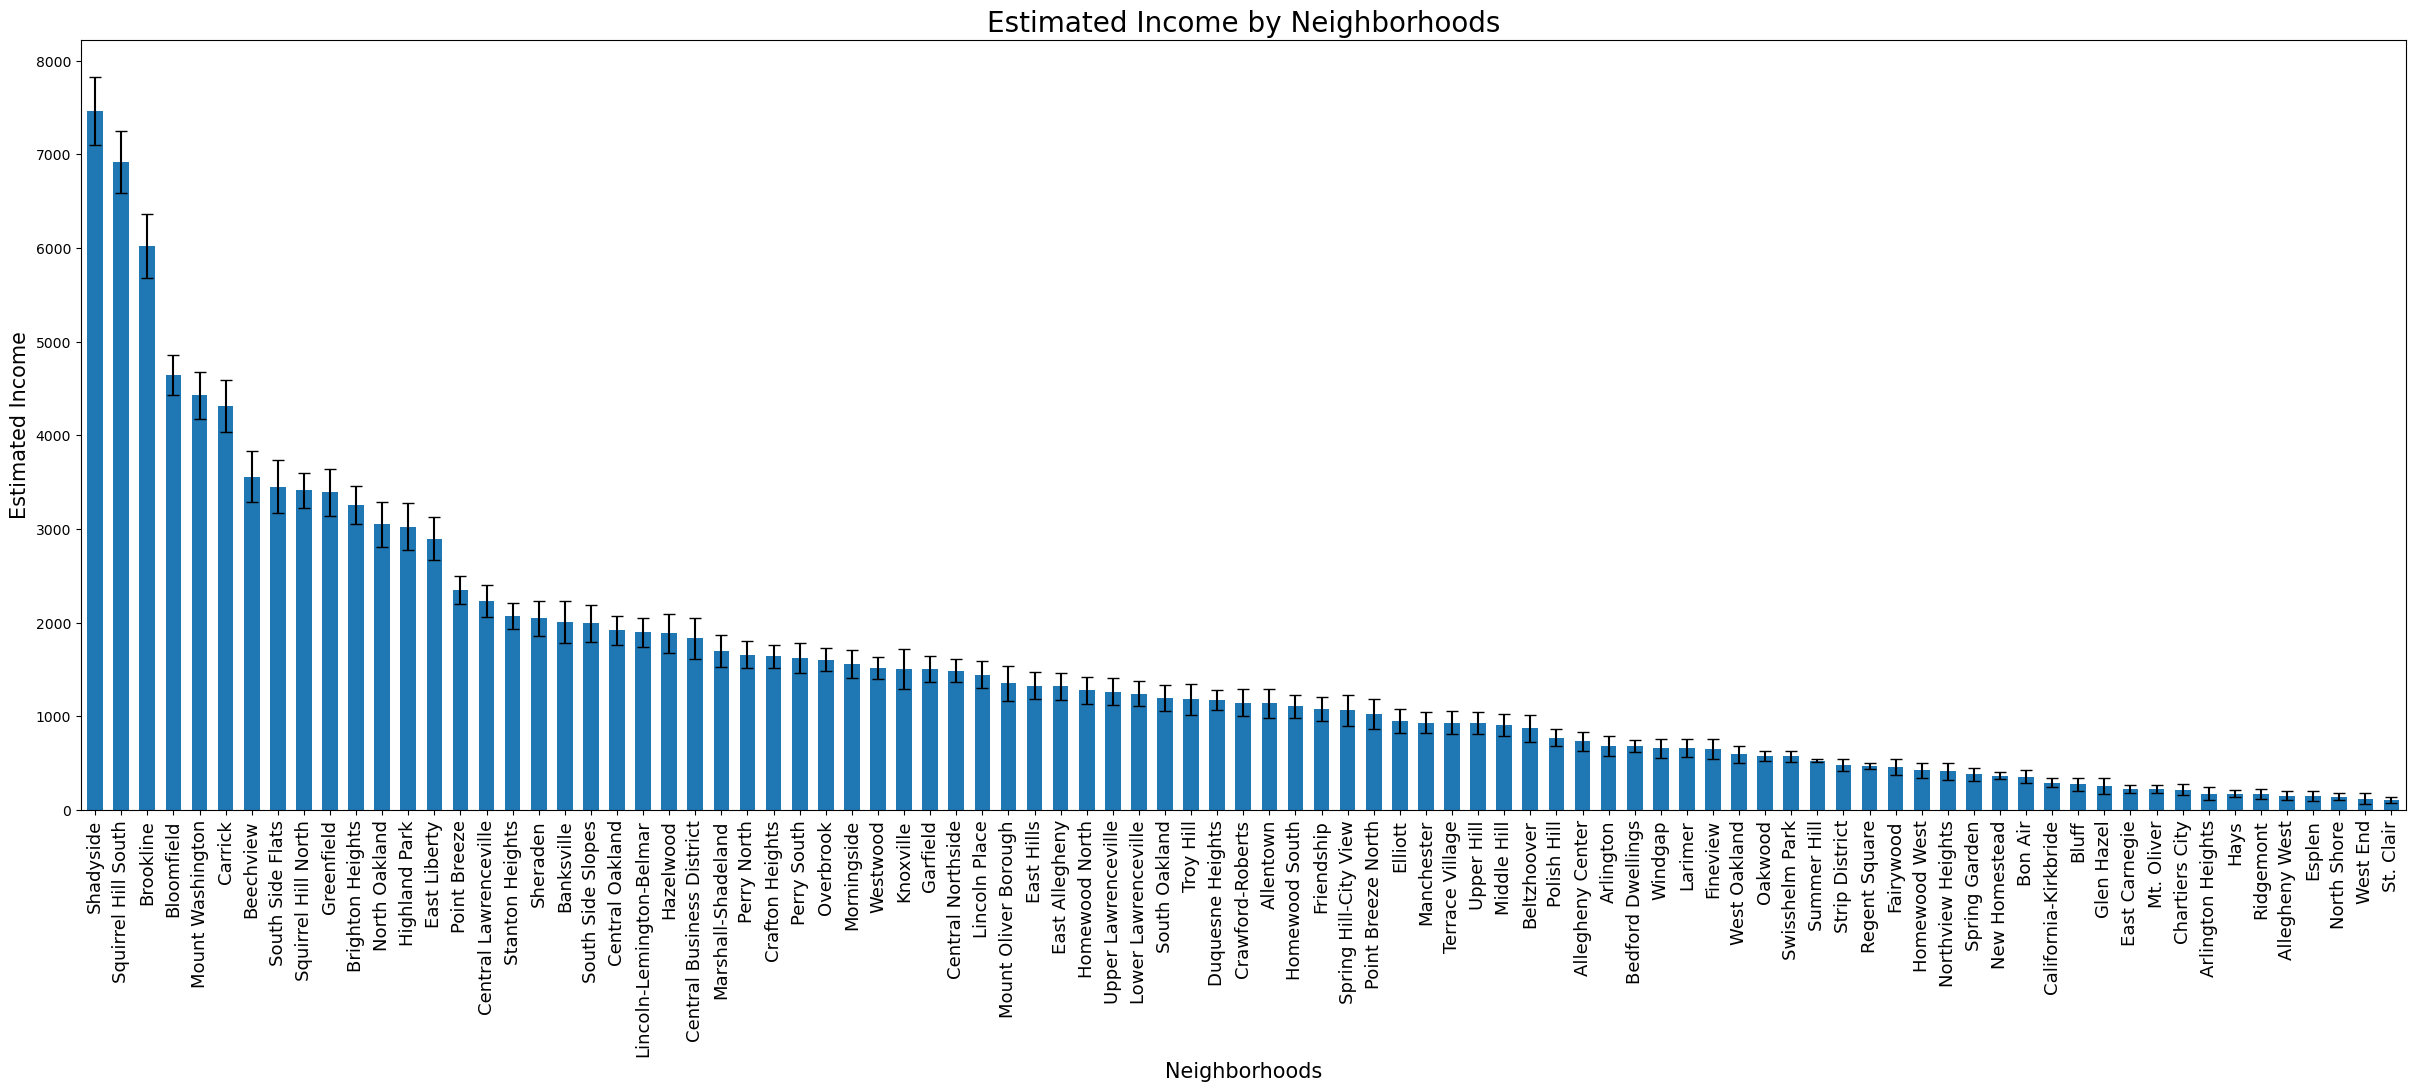

In [51]:
income_res['Income'].plot.bar(figsize=(30, 10), width=0.6, yerr=income_res['Margin of Error'], capsize=4)
plt.xlabel('Neighborhoods', fontsize=15)
plt.xticks(fontsize=13)
plt.ylabel('Estimated Income', fontsize=15)
plt.title('Estimated Income by Neighborhoods', fontsize=20)